## Phylogeny of datasets

### Minhash phylogeny - Sourmash

### Testing

##### making sketches

In [2]:
import sourmash
seq1 = "ATGGCA"
seq2 = "AGAGCA"

mh1 = sourmash.MinHash(n=0, ksize=3, scaled=1)
mh1.add_sequence(seq1, force=True)

mh2 = sourmash.MinHash(n=0, ksize=3, scaled=1)
mh2.add_sequence(seq2, force=True)

In [4]:
mh1.jaccard(mh1)

1.0

### Phage Minhashing 

##### iterating through kmers

In [21]:
from Bio import SeqIO
records = list(SeqIO.parse("phagehost_KU/phage_cleaned.fasta", "fasta"))
K = 31

#only first record
print("First record:", records[0].id, len(records[0].seq))
mh1 = sourmash.MinHash(n=0, ksize=K, scaled=1)
for i in range(0, len(records[0].seq) - K + 1):
    kmer = str(records[0].seq[i:i+K])
    mh1.add_sequence(kmer, force=True)
    #print(i, kmer, mh1.seq_to_hashes(kmer))

#second record
print("Second record:", records[1].id, len(records[1].seq))
mh2 = sourmash.MinHash(n=0, ksize=K, scaled=1)
for i in range(0, len(records[1].seq) - K + 1):
    kmer = str(records[1].seq[i:i+K])
    mh2.add_sequence(kmer, force=True)
    #print(i, kmer, mh2.seq_to_hashes(kmer))

First record: Lelliottia_phage_Pantea 150009
Second record: Lelliottia_phage_Rap 40557


Comparing sketches of mh1 and mh2

In [23]:
from tqdm import tqdm

#Constructing minhashes for all records
minhashes = []
for rec in tqdm(records, desc="Constructing minhashes for all records", unit="seq"):
    #print("Record:", rec.id, len(rec.seq))
    mh = sourmash.MinHash(n=0, ksize=K, scaled=1) #each record gets its own minhash
    for i in range(0, len(rec.seq) - K + 1):
        kmer = str(rec.seq[i:i+K])
        mh.add_sequence(kmer, force=True)
    minhashes.append(mh)

#Comparing all minhashes
similarity_matrix = dict()
for i, e in enumerate(minhashes):
    sim_inner = dict()
    for j, e2 in enumerate(minhashes):
        x = e.jaccard(minhashes[j])
        sim_inner[records[j].id.split("_")[-1]] = x
    similarity_matrix[records[i].id.split("_")[-1]] = sim_inner

Constructing minhashes for all records: 100%|██████████| 23/23 [00:05<00:00,  4.40seq/s]


#### Plotting similarity as heatmap

In [28]:
display(df)

,Pantea,Rap,Zann,Rip,Rup,Slaad,Crus,Gander,Guf,Hoejben,...,Galvinrad,Uther,Mimer,Abuela,Koroua,Sabo,Taid,Ymer,Amona,Poppous
Pantea,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rap,0.0,1.000000,0.003169,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zann,0.0,0.003169,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rip,0.0,0.000000,0.000000,1.000000,0.068696,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Rup,0.0,0.000000,0.000000,0.068696,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Slaad,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Crus,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.160067,0.726261,0.690746,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Gander,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.160067,1.000000,0.158351,0.157608,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Guf,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.726261,0.158351,1.000000,0.776370,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hoejben,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.690746,0.157608,0.776370,1.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: title={'center': 'MinHash Similarity of Phages'}>

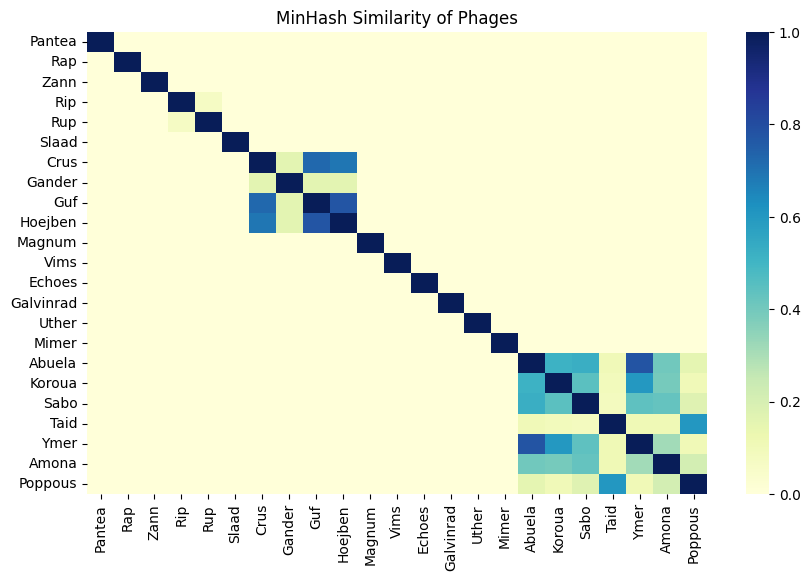

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(similarity_matrix)
fig = plt.figure(figsize=(10,6))
plt.title("MinHash Similarity of Phages")
sns.heatmap(df, cmap="YlGnBu")

<Axes: title={'center': 'MinHash Similarity of Selected Phages'}>

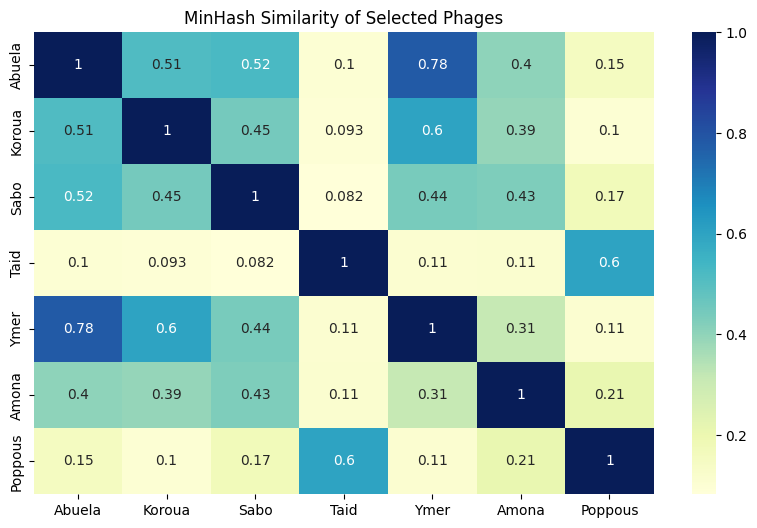

In [30]:
selected_phages = ["Abuela", "Koroua", "Sabo", "Taid", "Ymer", "Amona", "Poppous"]

fig = plt.figure(figsize=(10,6))
plt.title("MinHash Similarity of Selected Phages")
sns.heatmap(df[df.index.isin(selected_phages)][selected_phages], cmap="YlGnBu", annot=True)

### Bacteria Minhashing

##### iterating through kmers

Comparing sketches of mh1 and mh2

In [32]:
from Bio import SeqIO
records = list(SeqIO.parse("phagehost_KU/bacteriaKU_cleaned.fasta", "fasta"))
K = 37

In [36]:
from tqdm import tqdm

#Constructing minhashes for all records
minhashes = []
for rec in tqdm(records, desc="Constructing minhashes for all records", unit="seq"):
    #print("Record:", rec.id, len(rec.seq))
    mh = sourmash.MinHash(n=500000, ksize=K, scaled=0) #each record gets its own minhash | scaled=1000 to limit 
    for i in range(0, len(rec.seq) - K + 1):
        kmer = str(rec.seq[i:i+K])
        mh.add_sequence(kmer, force=True)
    minhashes.append(mh)

#Comparing all minhashes
similarity_matrix = dict()
for i, e in enumerate(minhashes):
    sim_inner = dict()
    for j, e2 in enumerate(minhashes):
        x = e.jaccard(minhashes[j])
        sim_inner[records[j].id] = x
    similarity_matrix[records[i].id] = sim_inner

Constructing minhashes for all records: 100%|██████████| 280/280 [1:53:04<00:00, 24.23s/seq]  


In [ ]:
#Saving sketches
for i in range(len(minhashes)):
    with open(f"data_prod/bact_minhash_37/bact{i}.sig", "wt") as sigfile:
        sig1 = sourmash.SourmashSignature(minhashes[i], name=records[i].id)
        sourmash.save_signatures([sig1], sigfile)

### Working with signatures

In [17]:
import sourmash, os, sys
"""
### Loading sigs
minhashes = []
sig_dir = "data_prod/bact_minhash_37/"
print("Number of signatures", len(os.listdir(sig_dir)))
for file in os.listdir(sig_dir):
    try:
        single_sig = sourmash.load_one_signature(sig_dir+file)
    except: #catching wrongful load of signatures
        print(f"Failed to load {file}, now exiting")
        sys.exit(1)
    minhashes.append(single_sig)
"""
### control input
for min in minhashes:
    print(str(min)[0:1000])
    continue

J3009LEM_22_KMC_reoriented
J15_21_reoriented
J91_22_reoriented
J96_22_reoriented
J37_21_reoriented
J65_21_reoriented
J108_22_reoriented
J8_21_reoriented
J96_22_reoriented
J91_22_reoriented
J15_21_reoriented
J3009LEM_22_KMC_reoriented
J106_22_reoriented
J15_21_reoriented
J128_23_reoriented
J96_22_reoriented
J62_22_reoriented
J65_21_reoriented
J51_21_reoriented
J86_22_reoriented
J65_21_reoriented
J62_22_reoriented
J96_22_reoriented
J93_22_reoriented
J15_21_reoriented
J106_22_reoriented
J25_21_reoriented
J15_21_reoriented
J96_22_reoriented
J134_23_reoriented
J65_21_reoriented
J8_21_reoriented
J48_21_reoriented
J48_21_reoriented
J8_21_reoriented
J65_21_reoriented
J134_23_reoriented
J96_22_reoriented
J15_21_reoriented
J2_21_reoriented
J73_21_reoriented
J106_22_reoriented
J38_21_reoriented
J96_22_reoriented
J96_22_reoriented
J65_21_reoriented
J65_21_reoriented
J65_21_reoriented
J65_21_reoriented
J96_22_reoriented
J96_22_reoriented
J38_21_reoriented
J106_22_reoriented
J73_21_reoriented
J66_21

In [6]:
import numpy as np
l = len(ids)
matrix = np.zeros((l,l))
for i, e in enumerate(minhashes):
    for j, e2 in enumerate(minhashes):
        matrix[i,j] = e.jaccard(e2)

matrix = pd.DataFrame(matrix)
matrix.columns = ids
matrix.index = ids
matrix

IndexError: index 110 is out of bounds for axis 1 with size 110

#### Plotting similarity as heatmap

<Axes: >

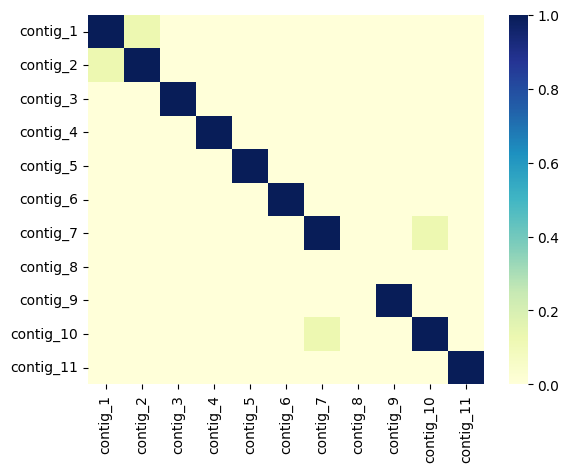

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(similarity_matrix)
sns.heatmap(df, cmap="YlGnBu")

### Minhash MIKE of KU datasets [ERROR]

In [ ]:
from biotools import mash

fasta_in = "phagehost_KU/phage_cleaned.fasta"
mash_out = "phagehost_KU/phage_cleaned.msh"

#out, err = mash.sketch(fasta_in, mash, threads=2)

ImportError: cannot import name 'mash' from 'biotools' (/Users/asbjornhansen/Library/Python/3.9/lib/python/site-packages/biotools/__init__.py)